In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# GPT

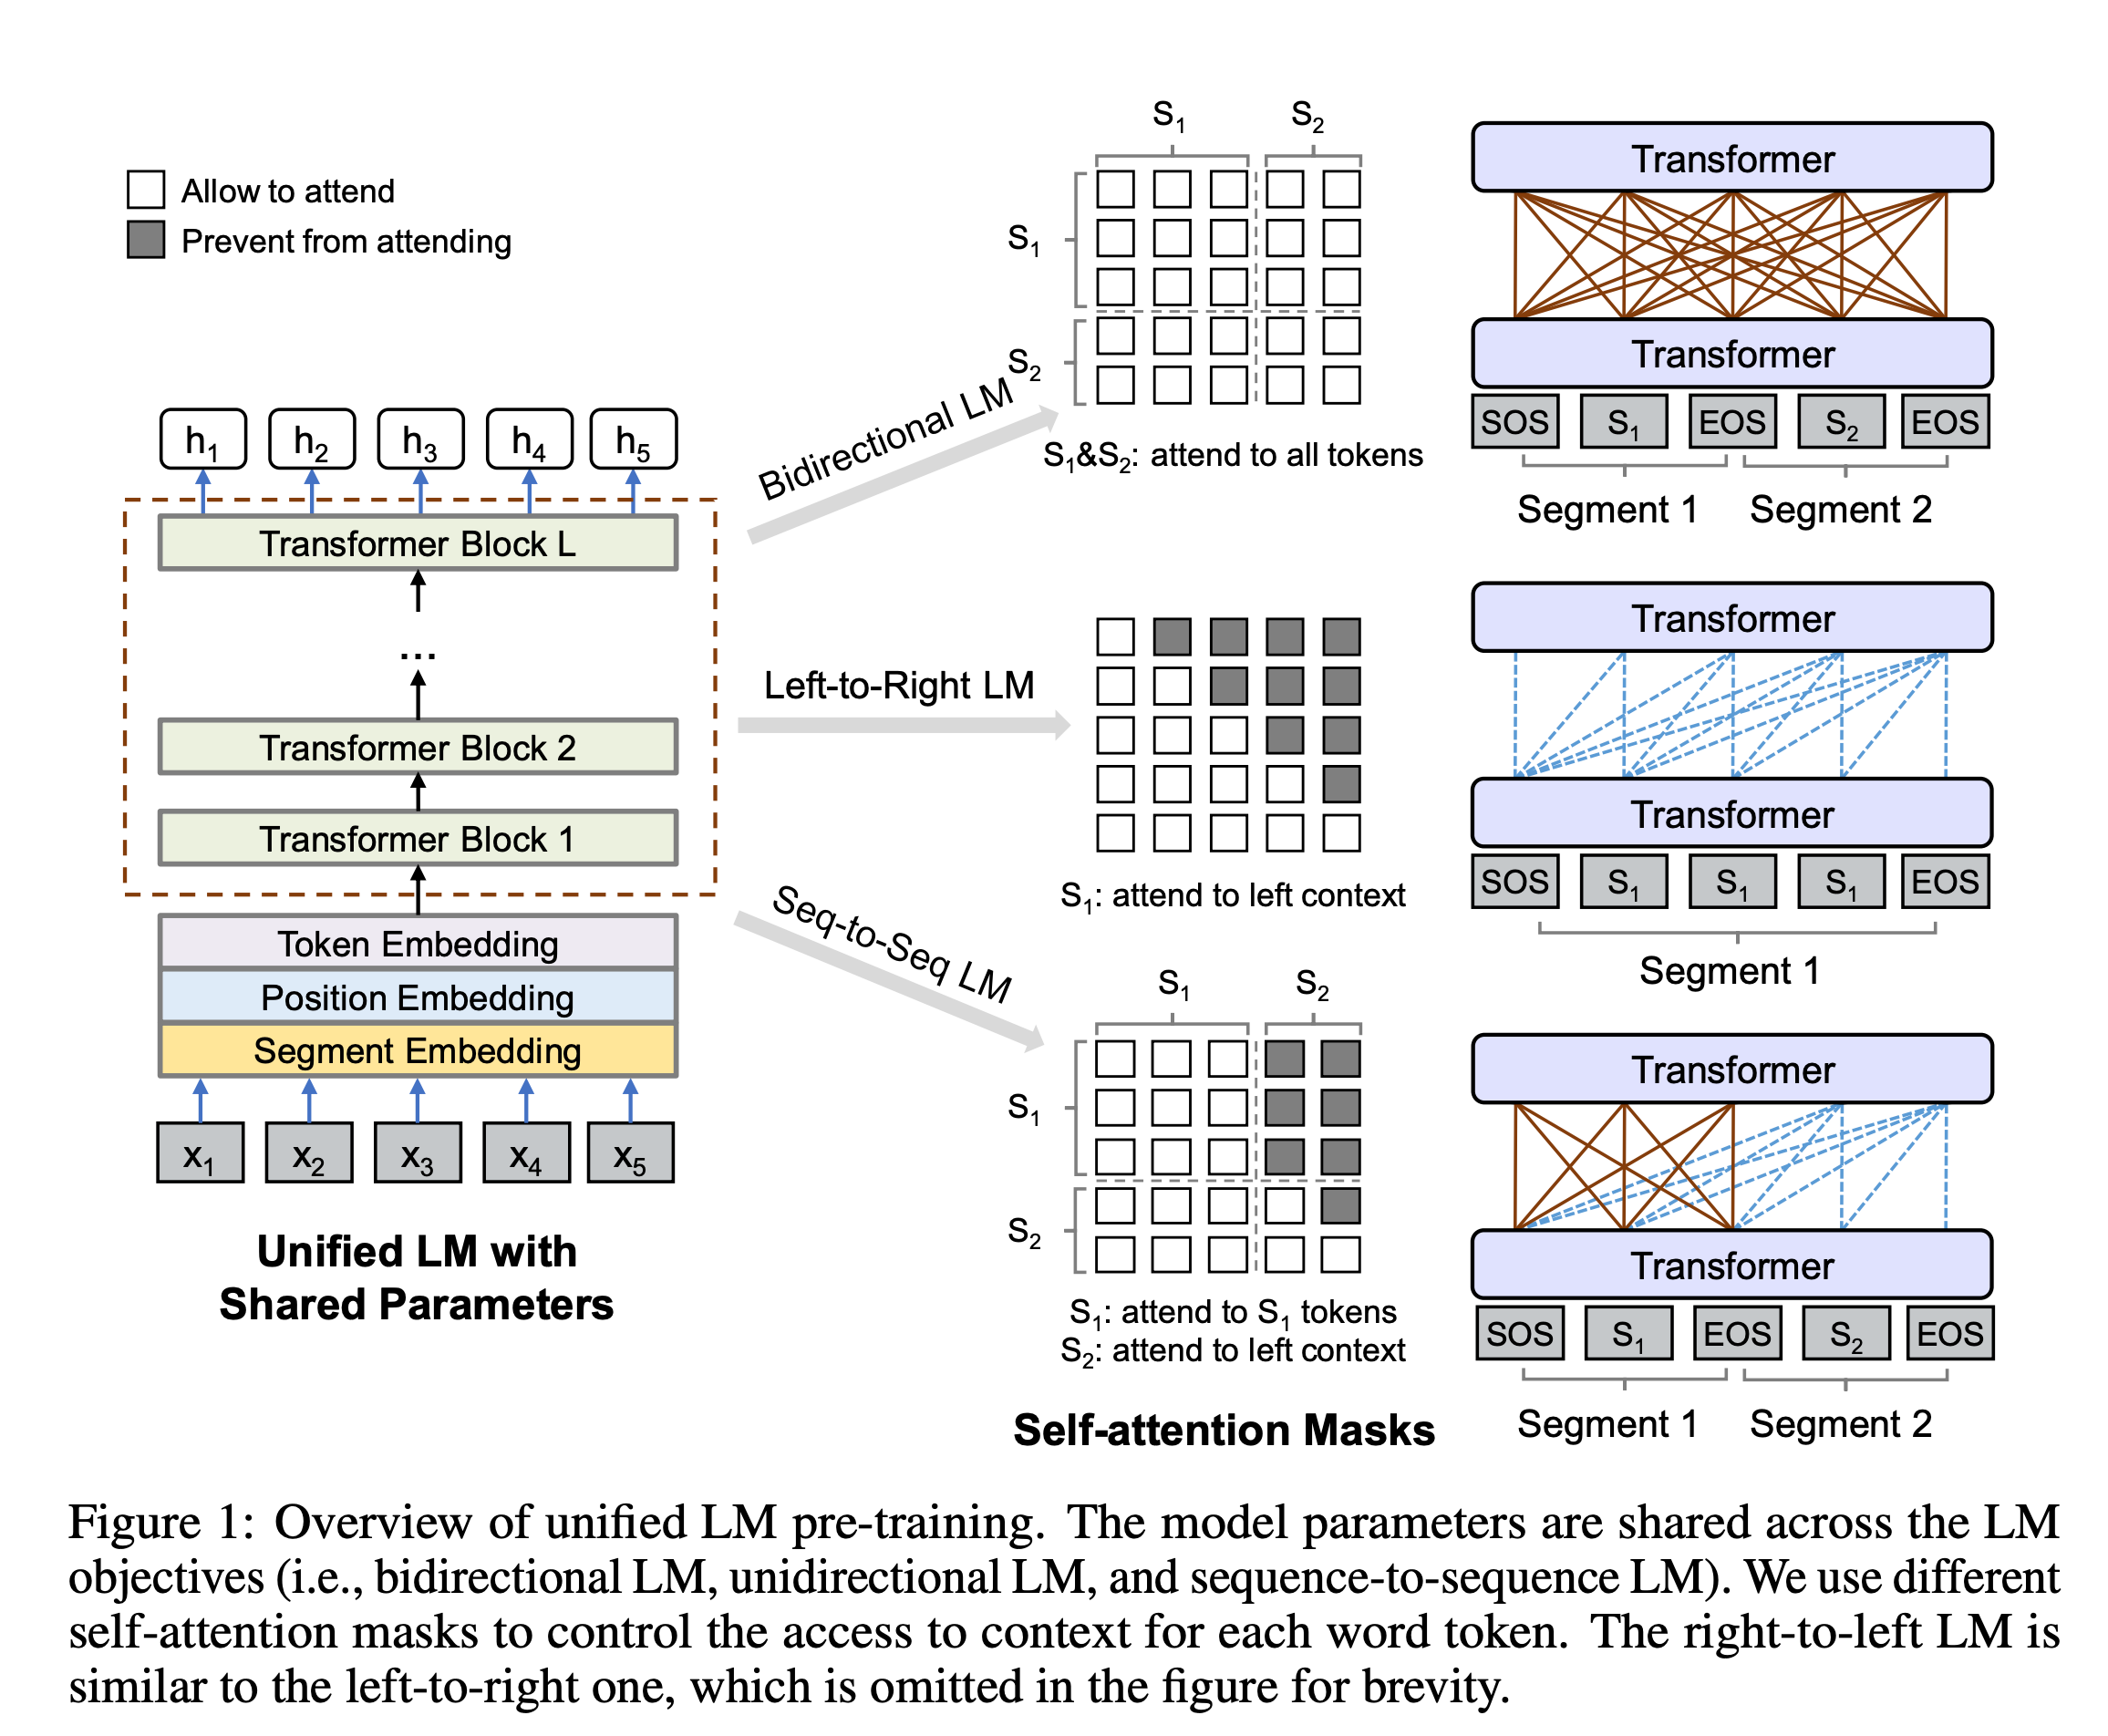

[1] Radford, Alec, Jeffrey Wu, Rewon Child, David Luan, Dario Amodei, and Ilya Sutskever. “Language Models Are Unsupervised Multitask Learners,” n.d., 24.

[2] Dong, Li, Nan Yang, Wenhui Wang, Furu Wei, Xiaodong Liu, Yu Wang, Jianfeng Gao, Ming Zhou, and Hsiao-Wuen Hon. “Unified Language Model Pre-Training for Natural Language Understanding and Generation.” In Advances in Neural Information Processing Systems, Vol. 32. Curran Associates, Inc., 2019. https://proceedings.neurips.cc/paper/2019/hash/c20bb2d9a50d5ac1f713f8b34d9aac5a-Abstract.html.

Blogs:

https://blog.csdn.net/qq_41139677/article/details/125252352

https://jalammar.github.io/illustrated-gpt2/

In [2]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

tokenizer = GPT2Tokenizer.from_pretrained("/pretrains/pt/gpt2")
gpt_model = GPT2LMHeadModel.from_pretrained("/pretrains/pt/gpt2")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
outputs = gpt_model(**inputs, labels=inputs["input_ids"])
loss = outputs.loss
logits = outputs.logits
# pred_ids = gpt_model.generate(input_ids=inputs.input_ids, attention_mask=inputs.attention_mask, max_length=50)
# print(tokenizer.batch_decode(pred_ids,clean_up_tokenization_spaces=True, skip_special_tokens=True))

FileNotFoundError: [Errno 2] No such file or directory: '/home/qing/.cache/huggingface/hub/models----pretrains--pt--gpt2/refs/main'

In [ ]:
logits.size()

In [6]:
print(gpt_model)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )


# Bart & T5

自回归(autoregressive)语言模型，如GPT，采用从左向右单向解码的方式，适用于自然语言生成（NLG）任务。非自回归(non-autoregressive)语言模型，如BERT，每个时刻的输出都可以充分利用双向信息，适用于自然语言理解（NLU）任务，但是在NLG上表现不佳。下文将介绍的两篇文章尝试在保留语言模型的自回归特性的情况下兼具上下文信息的学习，使预训练模型具备解决生成式任务能力的同事也能很好的解决NLU任务。


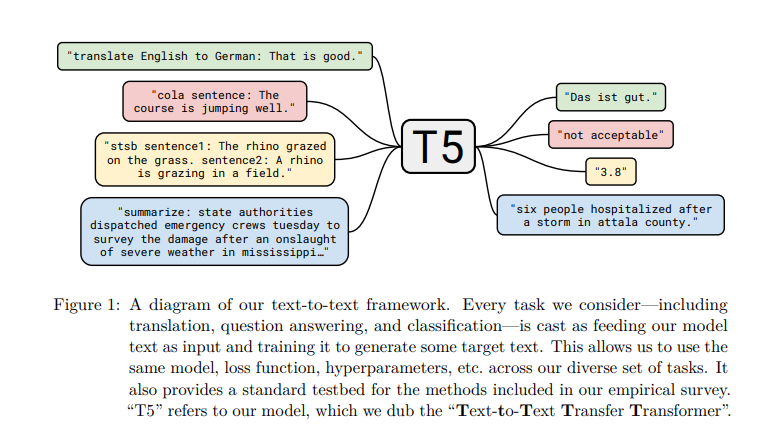 

T5：Exploring the Limits of Transfer Learning with a Unified Text-to-Text Transformer  T5是“Text-to-Text Transfer Transformer”的简称

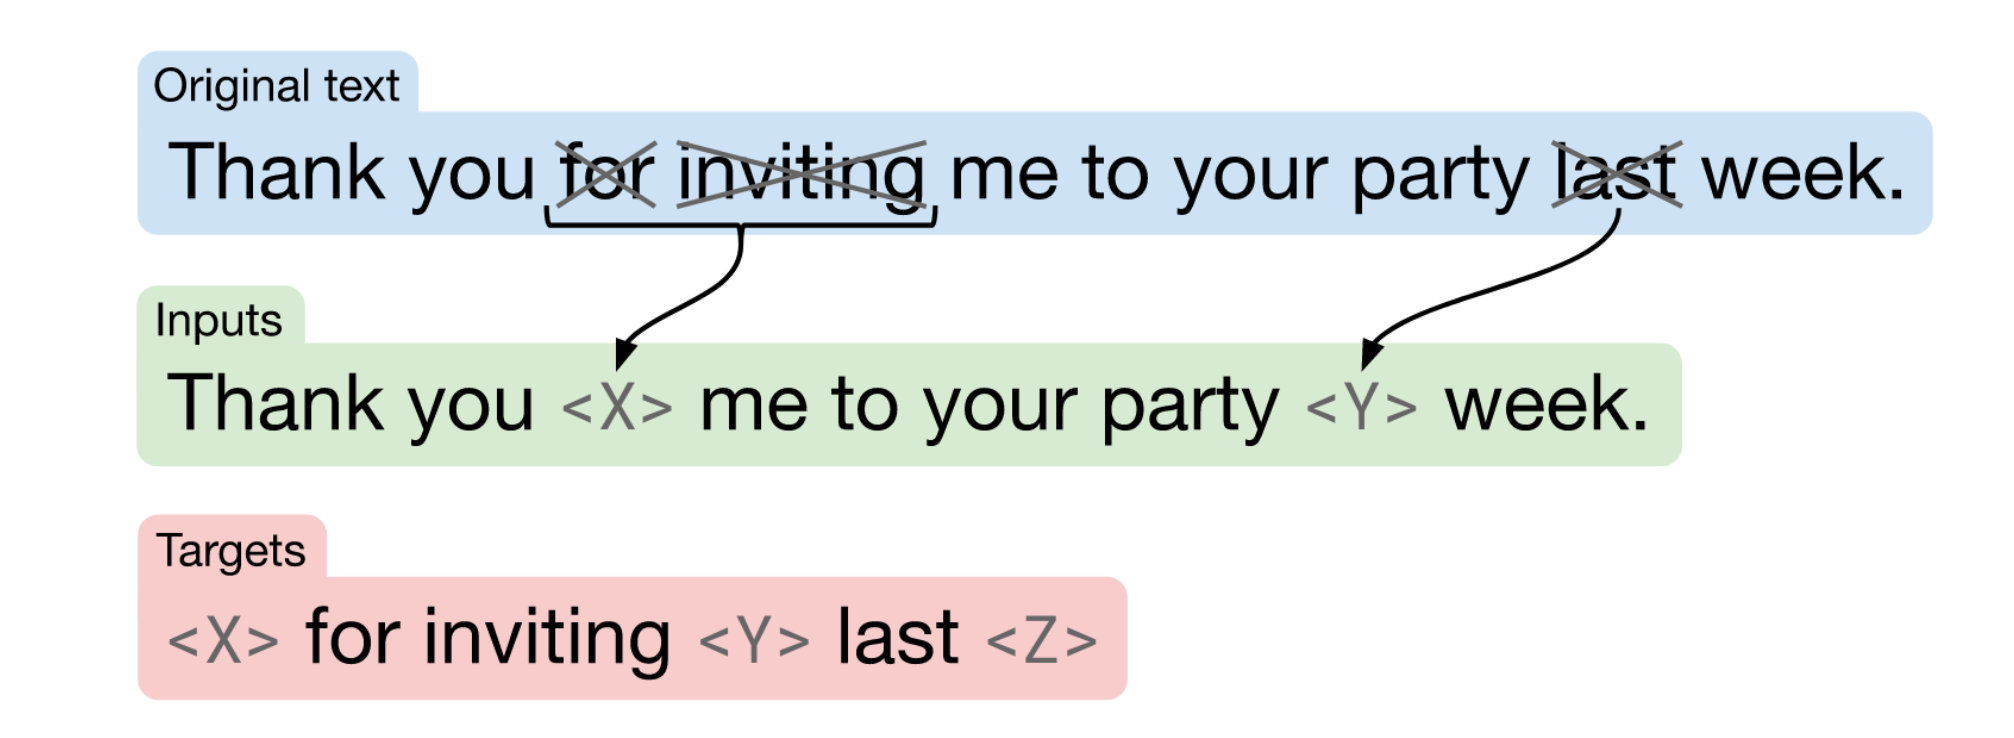
T5使用两种任务，分为无监督和有监督。其中无监督任务也是Span级别的mask，不过输出不需要还原整句，只需要输出mask掉的tokens就可以，总共mask15%字符。有监督任务提升不大，这里不展开说明。



------------

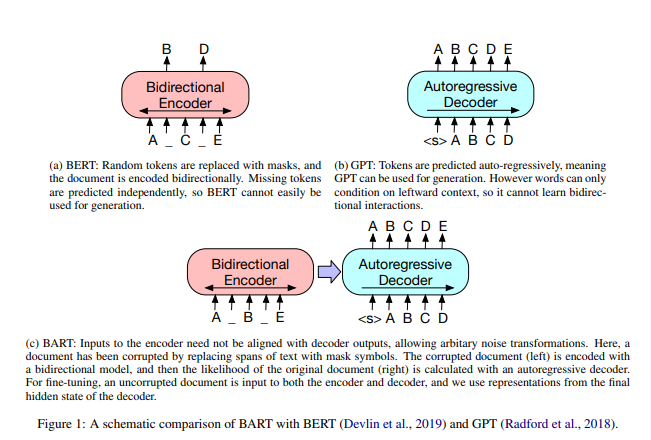

BART: Bidirectional and Auto-Regressive Transformers

BART的预训练任务是将带噪声的输入还原。如下图所示，输入为ABCDE，在AB中插入一个span长度为0的mask，再将CD替换为mask，最终得到加噪输入的A_B_E。模型的目标是将其还原为ABCDE。

BART最终使用Text Infilling + Sentence permutation，其中Text Infilling起到了最主要的作用，其实就是Span级别的mask，只不过这里允许span长度为0，span的长度服从泊松分布，lambda = 3，总共mask30%的字符。Sentence permutation提升不大，之所以使用是作者假设模型规模提升后这个任务会有用。

----

[3]Lewis, Mike, Yinhan Liu, Naman Goyal, Marjan Ghazvininejad, Abdelrahman Mohamed, Omer Levy, Veselin Stoyanov, and Luke Zettlemoyer. “BART: Denoising Sequence-to-Sequence Pre-Training for Natural Language Generation, Translation, and Comprehension.” In Proceedings of the 58th Annual Meeting of the Association for Computational Linguistics, 7871–80. Online: Association for Computational Linguistics, 2020. https://doi.org/10.18653/v1/2020.acl-main.703.


[4]Raﬀel, Colin, Noam Shazeer, Adam Roberts, Katherine Lee, Sharan Narang, Michael Matena, Yanqi Zhou, Wei Li, and Peter J Liu. “Exploring the Limits of Transfer Learning with a Uniﬁed Text-to-Text Transformer,” n.d., 67.


In [9]:
PLM = "/pretrains/pt/facebook-bart-base"
from transformers import BartForConditionalGeneration, BartTokenizer
tokenizer = BartTokenizer.from_pretrained(PLM)
bart_model = BartForConditionalGeneration.from_pretrained(PLM)

pred_ids = bart_model.generate(**tokenizer("French say hello by ", return_tensors="pt"), max_length=100)
print(tokenizer.batch_decode(pred_ids))

['</s><s>French say hello by </s>']


In [23]:
bart_model

BartForConditionalGeneration(
  (model): BartModel(
    (shared): Embedding(50265, 768, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): Embedding(50265, 768, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 768)
      (layers): ModuleList(
        (0): BartEncoderLayer(
          (self_attn): BartAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (final_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
        

In [15]:
PLM = "/pretrains/pt/google-mt5-base"
from transformers import MT5ForConditionalGeneration, MT5Tokenizer
mt5_tokenizer = MT5Tokenizer.from_pretrained(PLM)
mt5_model = MT5ForConditionalGeneration.from_pretrained(PLM)

In [22]:
pred_ids = mt5_model.generate(**mt5_tokenizer("French say hello by ", return_tensors="pt"), max_length=100)
print(mt5_tokenizer.batch_decode(pred_ids,clean_up_tokenization_spaces=True, skip_special_tokens=True))

['<extra_id_0>']


In [20]:
PLM = "/pretrains/pt/t5-small"
from transformers import T5ForConditionalGeneration, T5Tokenizer
t5_tokenizer = T5Tokenizer.from_pretrained(PLM)
t5_model = T5ForConditionalGeneration.from_pretrained(PLM)

In [21]:
pred_ids = t5_model.generate(**t5_tokenizer("French say hello by ", return_tensors="pt"), max_length=100)
print(t5_tokenizer.batch_decode(pred_ids,clean_up_tokenization_spaces=True, skip_special_tokens=True))

['Hallo, par']


In [24]:
t5_model

T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=512, bias=False)
              (k): Linear(in_features=512, out_features=512, bias=False)
              (v): Linear(in_features=512, out_features=512, bias=False)
              (o): Linear(in_features=512, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 8)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseReluDense(
              (wi): Linear(in_features=512, out_features=2048, bias=False)
              (wo): Linear(in_features=2048, out_features=512, bias=False)
              (dropout): Dro